<a href="https://colab.research.google.com/github/ebzkurt1/ml_with_torch/blob/main/PyTorch_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch import sigmoid

torch.manual_seed(0)

# Deep Learning with PyTorch
This notebook follows IBMs EDX course on Deep Learning with PyTorch

## Softmax Regression
Softmax regression class can be written using the `nn.Module` class. Inside the class the Linear module of the `torch.nn` is used.

In [ ]:
class SoftMax(nn.Module):
  def __init__(self, input_size, output_size):
    super(SoftMax, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    z = self.linear(x)
    return z

### Loading and examining MNIST data
Train and test data of MNIST can be loaded using the `torchvision.datasets` library. Data consists of 28-by-28 grayscale images. Each data sample is a tuple of the image pixels and the label of the image.

The trining dataset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist_data
    Split: Train
    StandardTransform
Transform: ToTensor()
The validation dataset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./mnist_data
    Split: Test
    StandardTransform
Transform: ToTensor()
Sample data label :  5
Sample from the training data : 



Text(0.5, 1.0, 'y =  5')

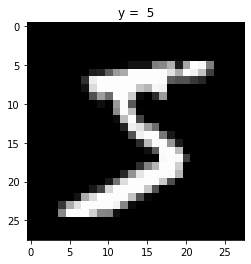

In [ ]:
# Loading the MNIST training dataset
train_dataset = dsets.MNIST(
    root='./mnist_data', # Data load directory
    train=True, # Whether to get the training data
    download=True, # Downloading the data if not available
    transform=transforms.ToTensor() # Transforming the data into tensor
)
# Printing the resulting data
print("The trining dataset:\n", train_dataset)
# Loading the validation dataset
validation_dataset = dsets.MNIST(
    root='./mnist_data', # Data directory
    train=False, # Set to False to get the test data
    download=True,
    transform=transforms.ToTensor()
)
# Printing the data load result
print("The validation dataset:\n", validation_dataset)

print("Sample data label : ", train_dataset[0][1])
# Printing a sample from the dataset
print('Sample from the training data : \n')
plt.imshow(train_dataset[0][0].numpy().reshape(28,28),cmap='gray')
plt.title('y =  ' + str(train_dataset[0][1]))

In [ ]:
train_img_shape = train_dataset[0][0].shape
print("Shape of the train image : ", train_img_shape)

input_dim = 28 * 28 # Shape of the image 28-by-28
output_dim = 10 # There are total of 10 numericals from 0 to 9

Shape of the train image :  torch.Size([1, 28, 28])


### Training the Softmax model

In [ ]:
# Constructing the Softmax model using custom model structure
model = SoftMax(
    input_size=input_dim, # Initializing the input dimension of the model
    output_size=output_dim # Inıtializing the output dimension of the model
)
print("The custom Softmax model : \n", model)

print("The model weight size : ", list(model.parameters())[0].size())
print("The model bias size : ", list(model.parameters())[1].size())

The custom Softmax model : 
 SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
The model weight size :  torch.Size([10, 784])
The model bias size :  torch.Size([10])


In [ ]:
# Helper function that can plot the weights as a 28-by-28 image to better 
# understand the behaviour of the model
def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            ax.set_xlabel("class: {0}".format(i))
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

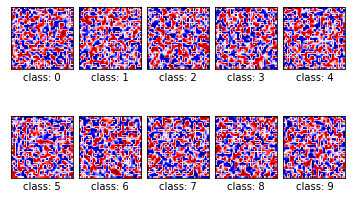

In [ ]:
PlotParameters(model)

In [ ]:
learning_rate = 0.1 # Specifying the model learning rate
# Constructing the optimizer
optimizer = torch.optim.SGD(
    model.parameters(), # Giving the base model parameters to the optimizer
    lr=learning_rate # Specifying the learning rate
)
# Specifying the Loss criterion of the model
criterion = nn.CrossEntropyLoss()
# Constructing the data loaders for the model
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=100
)
validation_loader = DataLoader(
    dataset=validation_dataset,
    batch_size=5000
)

n_epochs = 20 # Number of epochs for the model
loss_list = [] # List to store loss values per epoch
accuracy_list = [] # List to store accuracy values per epoch
N_test = len(validation_dataset) 
def model_train(n_epochs):
  """
  This function trains the model given the number of epochs
  """
  for epoch in range(n_epochs): # Iterating through the epochs
    for x,y in train_loader: # Iterating through data samples
      optimizer.zero_grad() # Setting the optimizer gradient to zero
      # Making model prediction. The image is flattaned out before being fed
      z = model(x.view(-1,28*28))
      loss = criterion(z,y) # Calculating the prediction loss
      loss.backward() # Taking the gradient of the loss
      optimizer.step() # Updating the model optimizer parameters
    correct = 0 # Number of correct predictions
    # Iterating through the validation set
    for x_validation, y_validation in validation_loader:
      # Making prediction for each sample
      z = model(x_validation.view(-1,28*28))
      _, yhat = torch.max(z.data,1) # The softmax function
      # Adding each correct prediction
      correct += (yhat==y_validation).sum()
    accuracy = correct / N_test # Calculating the accuracy
    loss_list.append(loss.data) # Appending the loss value of epoch
    accuracy_list.append(accuracy) # Appending the accuracy value of the epoch

model_train(n_epochs)

### Plotting the results of the model
The model results can be observed after the training period. The model loss drops while the accuracy increases at each epoch of the model.

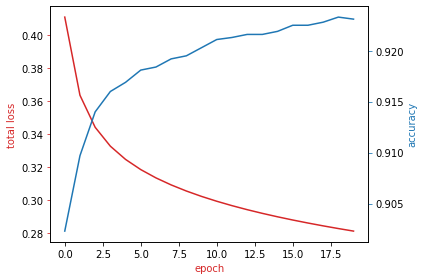

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Now that the model is trained, we can plot the weights and make observations. As it can be observed from the following graph when the weights are plotted in the same manner as the images the numbers become visible. The weights are now mimic the numbers from the images.

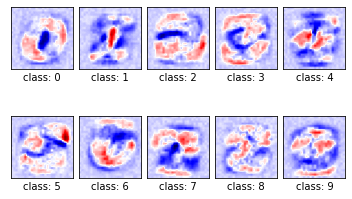

In [ ]:
PlotParameters(model)

## Shallow Neural Networks

In [2]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear_layer1 = nn.Linear(D_in,H)
        self.linear_layer2 = nn.Linear(H,D_out)
    def forward(self,x):
        x = sigmoid(self.linear_layer1(x))
        x = sigmoid(self.linear_layer2(x))
        return x

In [3]:
def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [15]:
def neural_net_train(X, Y, model, optimizer, criterion, epochs=100):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for x, y in zip(X,Y):
            yhat = model(x) # Make prediction
            loss = criterion(yhat,y) # Calculate the loss
            loss.backward() # Derivate the loss
            optimizer.step() # Update optimizer parameters
            optimizer.zero_grad() # Clear the gradient
            total += loss.item() # Cumulative loss calculation
        cost.append(total)
        if epoch % 300 == 0:
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
    return cost

In [16]:
# Making some arbitrary data for the model
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [17]:
criterion = nn.CrossEntropyLoss()

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

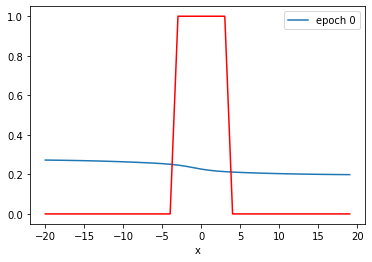

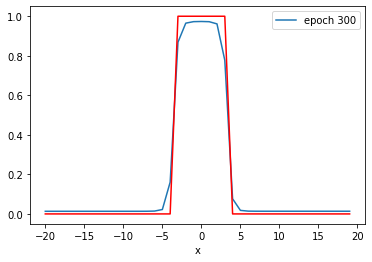

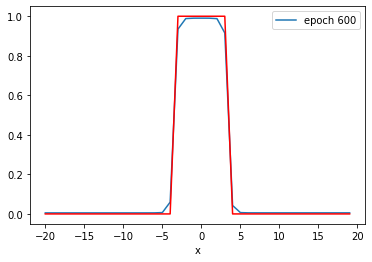

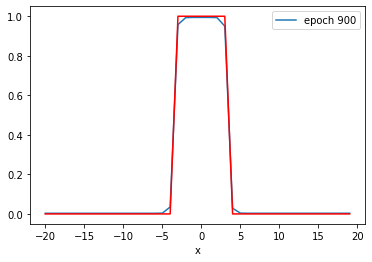

Text(0.5, 1.0, 'cross entropy loss')

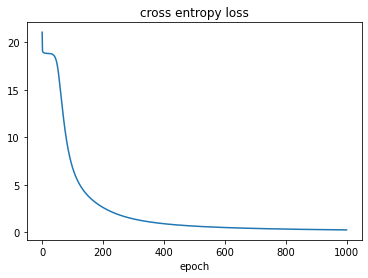

In [18]:
D_in = X.shape[-1]
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = neural_net_train(X, Y, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

### Multiple Neuron Network structure

In [20]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.linspace(-20, 20, 100).view(-1,1)
  
        self.y=torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)& (self.x[:,0]<-5)]=1
        self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
        self.y=self.y.view(-1,1)
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
            
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
data_set=Data()